In [1]:
!nvidia-smi

Fri Nov  1 05:48:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0              47W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
!wget https://dl.cv.ethz.ch/bdd100k/data/100k_images_test.zip
!wget https://dl.cv.ethz.ch/bdd100k/data/100k_images_test.zip.md5

--2024-11-01 05:49:03--  https://dl.cv.ethz.ch/bdd100k/data/100k_images_test.zip
Resolving dl.cv.ethz.ch (dl.cv.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to dl.cv.ethz.ch (dl.cv.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128865518 (1.1G) [application/zip]
Saving to: ‘100k_images_test.zip’

100k_images_test.zi 100%[===================>]   1.05G  19.9MB/s    in 57s     

2024-11-01 05:50:01 (19.0 MB/s) - ‘100k_images_test.zip’ saved [1128865518/1128865518]

--2024-11-01 05:50:01--  https://dl.cv.ethz.ch/bdd100k/data/100k_images_test.zip.md5
Resolving dl.cv.ethz.ch (dl.cv.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to dl.cv.ethz.ch (dl.cv.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55 [application/zip]
Saving to: ‘100k_images_test.zip.md5’

100k_images_test.zi 100%[===================>]      55  --.-KB/s    in 0s      

2024-11-01 05:50:02 (

In [3]:
import zipfile
import os
import numpy as np
# Extract the zip file
with zipfile.ZipFile('100k_images_test.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/images')

with open('100k_images_test.zip.md5', 'r') as f:
  md5_checksums = f.read()
print(md5_checksums) # This will print the contents of the file.

image_files = []
for root, dirs, files in os.walk('/content/images'):
  for file in files:
    image_files.append(os.path.join(root, file))

print(image_files)

6a7f3da5ef8a9a345254732bdbea14a4  100k_images_test.zip

['/content/images/bdd100k/images/100k/test/e865f192-d7c18433.jpg', '/content/images/bdd100k/images/100k/test/eb640f5f-b2ee91ac.jpg', '/content/images/bdd100k/images/100k/test/eb7459b0-17d9329f.jpg', '/content/images/bdd100k/images/100k/test/fd90b5f3-894f1401.jpg', '/content/images/bdd100k/images/100k/test/f1205e35-f2682974.jpg', '/content/images/bdd100k/images/100k/test/d98dda99-65bae625.jpg', '/content/images/bdd100k/images/100k/test/e8ef2f02-334479da.jpg', '/content/images/bdd100k/images/100k/test/d1226a6b-d269fc1b.jpg', '/content/images/bdd100k/images/100k/test/e30d52be-057b1685.jpg', '/content/images/bdd100k/images/100k/test/e56b5978-55818650.jpg', '/content/images/bdd100k/images/100k/test/e27ecab5-a513744f.jpg', '/content/images/bdd100k/images/100k/test/f2656a4d-27fda453.jpg', '/content/images/bdd100k/images/100k/test/d395a0da-921b9a5c.jpg', '/content/images/bdd100k/images/100k/test/cf617610-8b3645df.jpg', '/content/images/bd


# ** Test out different models on BDD dataset for inference **

**Detectron2**

In [4]:
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.d
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 17.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-16_7x03c
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-16_7x03c
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8d85329aed8506ea3672e3e208971345973ea761
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/5

In [5]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.5 ; cuda:  cu121
detectron2: 0.6


In [6]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import cv2

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

/content/images/bdd100k/images/100k/test/f7379b95-bae15b41.jpg


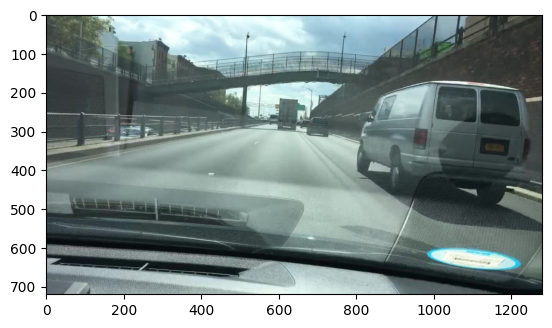

In [7]:
# select a single random image from the dataset
selected_img = image_files[np.random.choice(len(image_files), 1, replace=False)[0]]
print(selected_img)
im = cv2.imread(selected_img)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [8]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

In [9]:
# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

[11/01 06:03:35 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 247MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


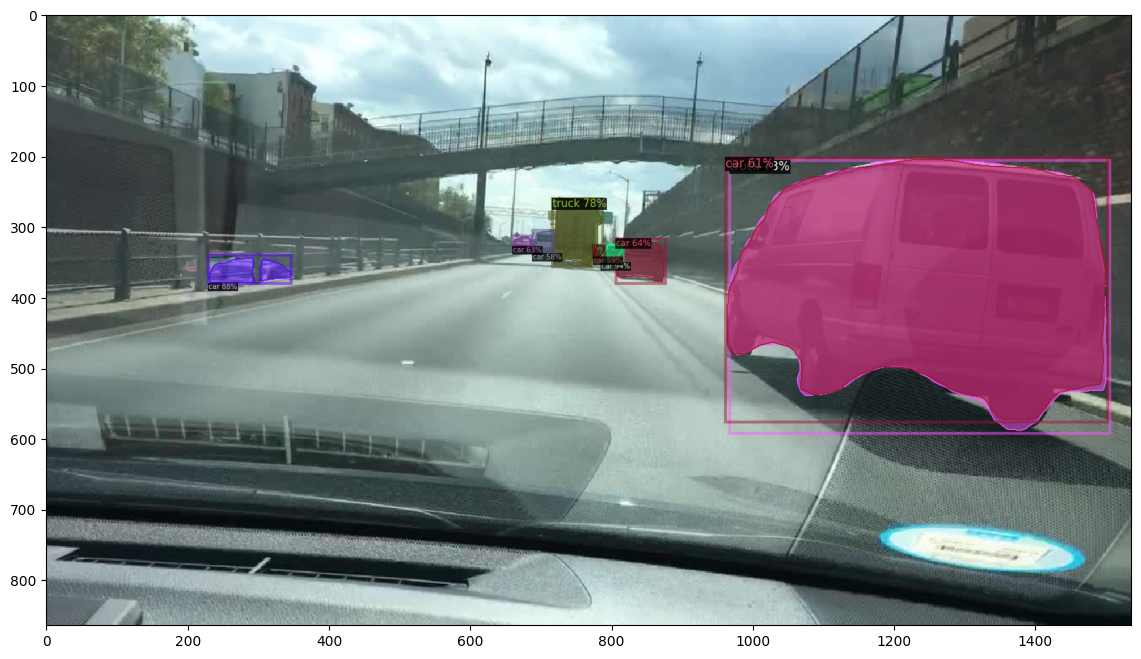

In [10]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))